In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
# Importing data
uploaded = files.upload()



Saving netflix_titles.csv to netflix_titles (2).csv


In [ ]:
# Read file into dataframe - encountered a UnicodeDecodeError while trying to read the CSV file into a pandas DataFrame.
# This error typically occurs when the file contains characters that are not encoded in UTF-8 format, which is the default encoding used by pd.read_csv().
df = pd.read_csv('netflix_titles.csv', encoding='ISO-8859-1')
df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,"April 5, 2024",2024,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Trouble opening - Unicode error
file_path = 'netflix_titles.csv'

with open(file_path, 'rb') as file:
    file.seek(202)  # Seek to position 203 (positions are 0-indexed)
    byte = file.read(1)  # Read one byte from the file
    print(byte)




b'2'


In [ ]:
with open('netflix_titles.csv', 'rb') as file:
    # Read the binary content of the file
    file_content = file.read()

# Decode the binary content using utf-8 encoding with error handling
decoded_content = file_content.decode('utf-8', errors='replace')

# Convert the decoded content to a StringIO object
from io import StringIO
string_io = StringIO(decoded_content)

# Read the CSV using pd.read_csv()
df = pd.read_csv(string_io, usecols=['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'])

print(df.columns)
print(df.head())


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  r

In [ ]:
# Filter out rows with NaN values in 'date_added' or 'release_year' / Data is as of mid 2021
filtered_df = df.dropna(subset=['date_added', 'release_year'])

# Filter out rows with 'release_year' greater than or equal to 2018
filtered_df = filtered_df[filtered_df['release_year'] >= 2018]

# Grouping by both 'release_year' and 'date_added' and counting the number of titles
year_added_counts = filtered_df.groupby(['release_year', 'date_added']).size()

# Resetting the index to make 'release_year' and 'date_added' columns
year_added_counts_reset = year_added_counts.reset_index()

# Displaying the result
print(year_added_counts_reset)



      release_year         date_added  0
0             2018    August 13, 2018  1
1             2018   January 11, 2019  1
2             2018   January 12, 2019  1
3             2018      July 20, 2018  1
4             2018       May 19, 2018  1
...            ...                ... ..
1536          2021  September 6, 2021  1
1537          2021  September 7, 2021  4
1538          2021  September 8, 2021  3
1539          2021  September 9, 2021  2
1540          2024      April 5, 2024  1

[1541 rows x 3 columns]


In [ ]:
# Calculate the frequency of values in the specified column - genre
frequency_table = df['listed_in'].value_counts()
frequency_table

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Horror Movies, LGBTQ Movies, Music & Musicals           1
Drama, Romance, Thriller                                1
Name: count, Length: 516, dtype: int64

In [ ]:
# Descriptive statistics for 'release_year'
release_year_stats = filtered_df['release_year'].describe()
print("Descriptive statistics for release_year:")
print(release_year_stats)
print()

# Descriptive statistics for 'date_added'
date_added_counts = filtered_df['date_added'].value_counts()
print("Counts of titles by date_added:")
print(date_added_counts)

# Avg release year is mean 2019.268, SD 1.066 moderate variability around mean; median release 2019 50% have release year of 2019 or earlier
# max release 2024 misleading as data is only up to mid 2021. June/July most release months

Descriptive statistics for release_year:
count    3722.000000
mean     2019.267598
std         1.065633
min      2018.000000
25%      2018.000000
50%      2019.000000
75%      2020.000000
max      2024.000000
Name: release_year, dtype: float64

Counts of titles by date_added:
date_added
July 6, 2021         28
June 19, 2021        20
November 1, 2019     19
November 1, 2020     18
October 1, 2020      18
                     ..
December 7, 2019      1
December 8, 2019      1
December 9, 2019      1
December 10, 2019     1
April 5, 2024         1
Name: count, Length: 1017, dtype: int64


In [ ]:
# Calculate the count of titles for each release year
release_year_counts = filtered_df['release_year'].value_counts()

# Sort the counts in ascending order of release year
release_year_counts_sorted = release_year_counts.sort_index()

# Display the counts of titles for each release year
print("Counts of titles by release year:")
print(release_year_counts_sorted)


Counts of titles by release year:
release_year
2018    1146
2019    1030
2020     953
2021     592
2024       1
Name: count, dtype: int64


In [ ]:
# Split the 'listed_in' column to extract individual genres
genres = df['listed_in'].str.split(', ')

# Create an empty dictionary to store genre counts
genre_counts = {}

# Count the occurrences of each genre
for genre_list in genres:
    for genre in genre_list:
        genre = genre.strip()  # Remove leading and trailing whitespaces
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

# Find the genre with the highest count
most_watched_genre = max(genre_counts, key=genre_counts.get)
most_watched_genre_count = genre_counts[most_watched_genre]

# Display the most watched genre and its count
print("Most watched genre:", most_watched_genre)
print("Number of titles in this genre:", most_watched_genre_count)
# It would be interesting to see what language was most watched in International Movies; well maybe not most watched but most NF has


Most watched genre: International Movies
Number of titles in this genre: 2752


In [ ]:

# Filter the DataFrame to include only rows with the 'International Movies' genre
international_movies_df = df[df['listed_in'].str.contains('International Movies')]

# Filter the DataFrame to exclude rows with a value of 0 or NaN in the 'rating' column
filtered_df = international_movies_df[(international_movies_df['rating'].notna()) & (international_movies_df['rating'] != 0)]

# Perform cross-tabulation between 'International Movies' genre and 'rating'
cross_tab_international_movies = pd.crosstab(index=filtered_df['rating'], columns='Count')

# Display the cross-tabulation table
print(cross_tab_international_movies)

# international movies TV-MA

col_0   Count
rating       
G           1
NC-17       2
NR         34
PG         13
PG-13      54
R         101
TV-14    1065
TV-G       54
TV-MA    1130
TV-PG     294
TV-Y        1
TV-Y7       1
UR          2


In [ ]:
# Count the number of titles for each country
title_count_by_country = filtered_df['country'].value_counts()

# Get the top ten countries with the most releases
top_ten_countries = title_count_by_country.nlargest(10)

# Display the table of top ten countries with the most releases
print(top_ten_countries)



country
India             817
Spain              90
Egypt              89
Nigeria            81
Turkey             74
Indonesia          73
Philippines        72
France             68
United Kingdom     66
Japan              58
Name: count, dtype: int64


In [ ]:
# rating column has non-numeric values cannot use to calculate mean without mapping:
# Define a mapping dictionary for TV ratings to numeric values
rating_mapping = {
    'TV-MA': 18,
    'TV-14': 14,
    'TV-PG': 10,
}

# Map the 'rating' column to numeric values using the mapping dictionary
filtered_df_top_ten_countries['rating_numeric'] = filtered_df_top_ten_countries['rating'].map(rating_mapping)

# Calculate the average rating for titles from the top ten countries
average_rating_by_country = filtered_df_top_ten_countries.groupby('country')['rating_numeric'].mean()

# Display the table of average rating for each country from the top ten
print(average_rating_by_country)
# Egypt is TV-14, France is between TV-14 and TV-MA

country
Egypt             14.909091
France            16.562500
India             14.435000
Indonesia         13.812500
Japan             14.428571
Nigeria           15.250000
Philippines       15.014925
Spain             17.494253
Turkey            16.166667
United Kingdom    15.739130
Name: rating_numeric, dtype: float64


<ipython-input-67-cad8a9a57543>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_top_ten_countries['rating_numeric'] = filtered_df_top_ten_countries['rating'].map(rating_mapping)


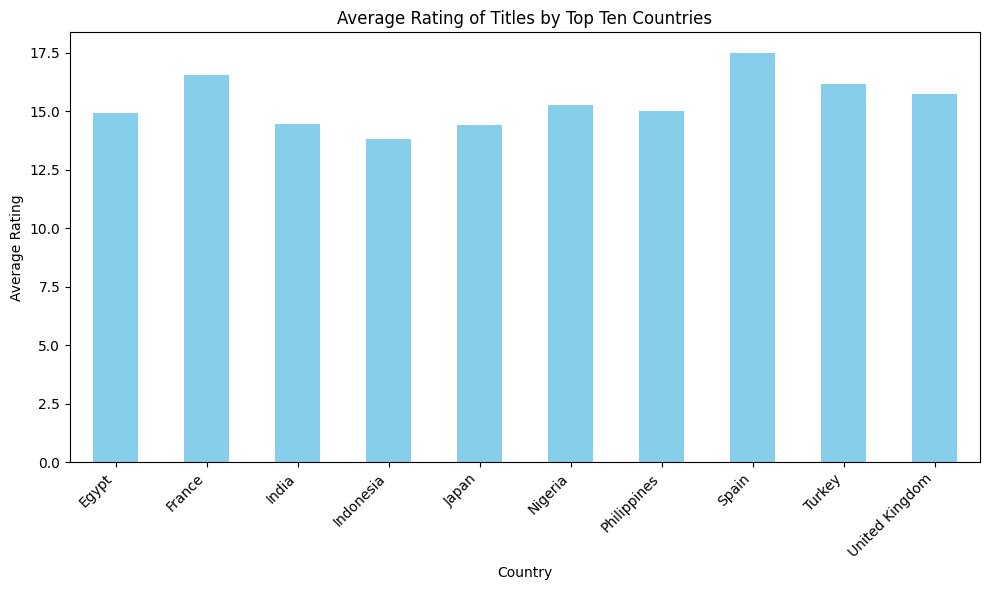

In [ ]:
# Plot the average rating by country
plt.figure(figsize=(10, 6))
average_rating_by_country.plot(kind='bar', color='skyblue')
plt.title('Average Rating of Titles by Top Ten Countries')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


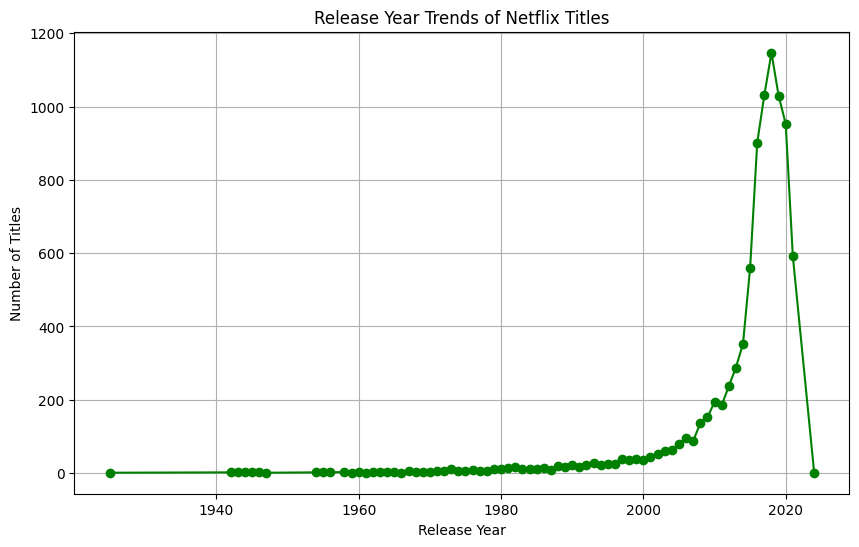

In [ ]:
# Group by 'release_year' and count the number of titles for each year
release_year_counts = df['release_year'].value_counts().sort_index()

# Plot release year trends
plt.figure(figsize=(10, 6)) #inches
release_year_counts.plot(kind='line', marker='o', color='green')
plt.title('Release Year Trends of Netflix Titles')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()
# misleading as data is only through mid 2021 or is because of covid?

In [ ]:
#  TypeError because column has string and floats or other types?
# Convert 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Find the last date_added
last_date_added = df['date_added'].max()

print("Last date_added:", last_date_added)
# Is this outlier?

Last date_added: 2024-04-05 00:00:00


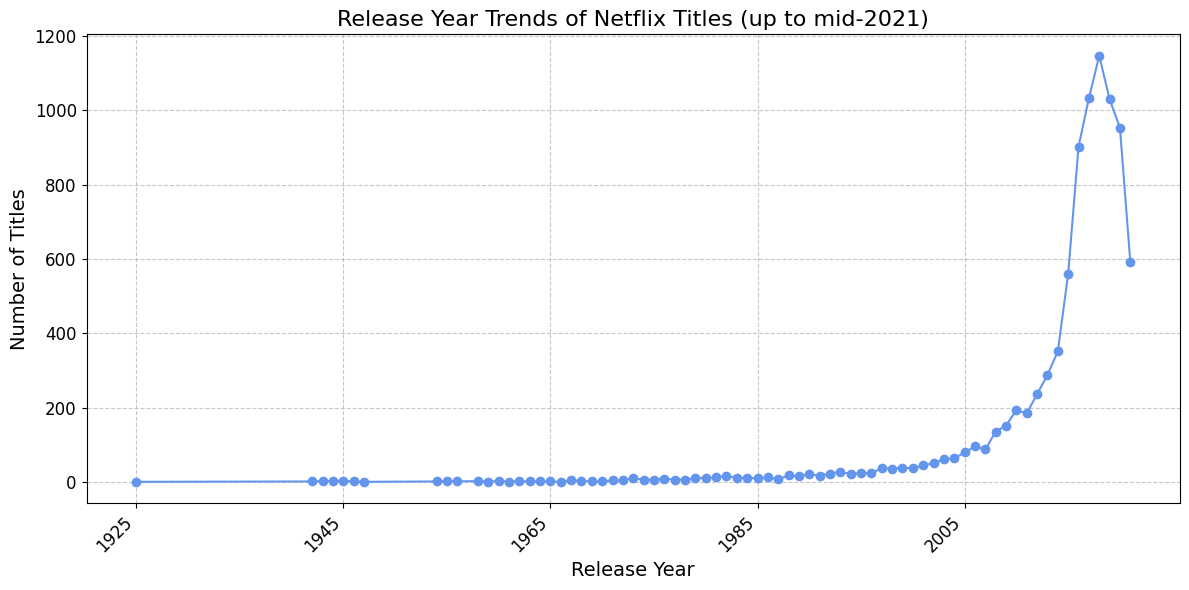

In [ ]:

# Filter out rows where date_added is equal to the outlier date
df_filtered = df[df['date_added'] != '2024-04-05']

# Group by 'release_year' and count the number of titles for each year
release_year_counts = df_filtered['release_year'].value_counts().sort_index()

# Plot release year trends
plt.figure(figsize=(12, 6))
plt.plot(release_year_counts.index, release_year_counts.values, marker='o', color='cornflowerblue', linestyle='-')
plt.title('Release Year Trends of Netflix Titles (up to mid-2021)', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(min(release_year_counts.index), max(release_year_counts.index)+1, 20), rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Convert 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Define a date representing mid-2021 (July 1, 2021)
mid_2021_date = pd.to_datetime('2021-07-01')

# Filter the DataFrame to include only rows with 'date_added' after mid-2021
dates_after_mid_2021 = df[df['date_added'] > mid_2021_date]

# Display the rows with 'date_added' after mid-2021
print("Dates after mid-2021:")
print(dates_after_mid_2021['date_added'])

Dates after mid-2021:
0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
555    2021-07-02
556    2021-07-02
557    2021-07-02
8807   2024-04-05
8808   2024-04-05
Name: date_added, Length: 560, dtype: datetime64[ns]


In [ ]:
# https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows/data